In [85]:
import pandas as pd

data = pd.read_csv('train.csv')

data

print(data.head(10).to_markdown())

|    |   id |   keyword |   location | text                                                                                                                                  |   target |
|---:|-----:|----------:|-----------:|:--------------------------------------------------------------------------------------------------------------------------------------|---------:|
|  0 |    1 |       nan |        nan | Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                 |        1 |
|  1 |    4 |       nan |        nan | Forest fire near La Ronge Sask. Canada                                                                                                |        1 |
|  2 |    5 |       nan |        nan | All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected |        1 |
|  3 |    6 |       nan |        nan | 13,000 people receive #wildfire

In [86]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [87]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet') 
cleaned_text = []

def clean_text(text):
    text = re.sub(r"&amp", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    tokens = nltk.word_tokenize(text)
    lemmer = nltk.WordNetLemmatizer()
    tokens = [word.lower() for word in tokens if word.lower() not in stopwords.words("english")]
    tokens = [lemmer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

for row in data["text"]:
    cleaned_text.append(clean_text(row))

data["cleaned_text"] = cleaned_text

data

[nltk_data] Downloading package stopwords to /home/sphere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sphere/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sphere/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria_ahrary thetawniest control wild fire cali...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...


In [88]:
emergency_word_counts = data[data["target"] == 1]["cleaned_text"].str.split(expand=True).stack().value_counts()

top_ten = emergency_word_counts.head(10)

non_emergency_word_counts = data[data["target"] == 0]["cleaned_text"].str.split(expand=True).stack().value_counts()

top_ten_non = non_emergency_word_counts.head(10)

top_ten

print(emergency_word_counts.index)

Index(['fire', 'news', 'via', 'disaster', 'california', 'suicide', 'police',
       'people', 'family', 'u',
       ...
       'totoooooo', 'duststorm', 'httptcoqwqnni7vmz', 'gibraltar', 'strait',
       'morocco', 'modis', 'httptco0mnpcer9no', 'httptcojkpjpch9i6',
       'httptcoymy4rskq3d'],
      dtype='object', length=11234)


Text(0, 0.5, 'Word')

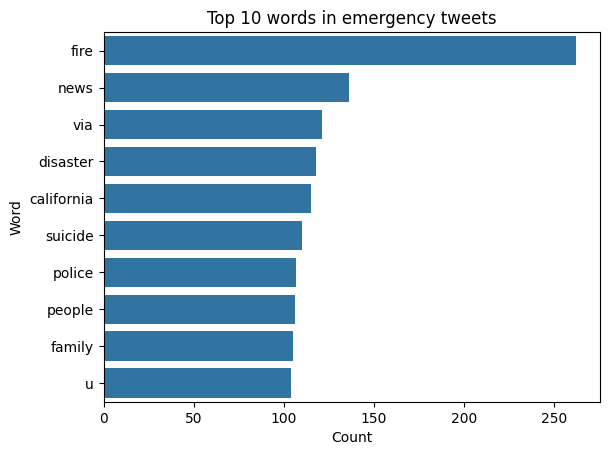

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_ten.values, y=top_ten.index)
plt.title("Top 10 words in emergency tweets")
plt.xlabel("Count")
plt.ylabel("Word")

Text(0, 0.5, 'Word')

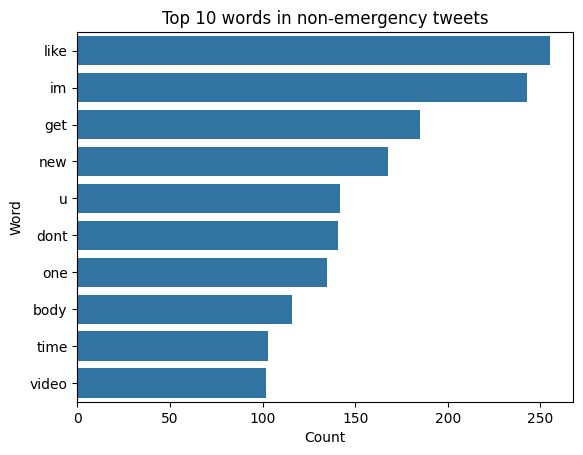

In [90]:
sns.barplot(x=top_ten_non.values, y=top_ten_non.index)
plt.title("Top 10 words in non-emergency tweets")
plt.xlabel("Count")
plt.ylabel("Word")

In [91]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["cleaned_text"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=78)

Y_pred = SVC().fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.77      0.93      0.84       658
           1       0.87      0.63      0.73       484

    accuracy                           0.80      1142
   macro avg       0.82      0.78      0.78      1142
weighted avg       0.81      0.80      0.79      1142



In [92]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data["cleaned_text"])
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=78)

Y_pred = SVC().fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       658
           1       0.85      0.66      0.74       484

    accuracy                           0.81      1142
   macro avg       0.82      0.79      0.79      1142
weighted avg       0.81      0.81      0.80      1142



In [93]:
from sklearn.ensemble import RandomForestClassifier

Y_pred = RandomForestClassifier().fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83       658
           1       0.83      0.63      0.72       484

    accuracy                           0.79      1142
   macro avg       0.80      0.77      0.77      1142
weighted avg       0.80      0.79      0.78      1142



In [95]:
from sklearn.neural_network import MLPClassifier

Y_pred = MLPClassifier().fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       658
           1       0.74      0.67      0.70       484

    accuracy                           0.76      1142
   macro avg       0.76      0.75      0.75      1142
weighted avg       0.76      0.76      0.76      1142

